In [1]:
# Q1. Generate a list of 100 integers containing values between 90 to 130 and store it in the variable `int_list`.
# After generating the list, find the following:
# (i) Write a Python function to calculate the mean of a given list of numbers.
# Create a function to find the median of a list of numbers.
# (ii) Develop a program to compute the mode of a list of integers.
# (iii) Implement a function to calculate the weighted mean of a list of values and their corresponding weights.
# (iv) Write a Python function to find the geometric mean of a list of positive numbers.
# (v) Create a program to calculate the harmonic mean of a list of values.
# (vi) Build a function to determine the midrange of a list of numbers (average of the minimum and maximum).
# (vii) Implement a Python program to find the trimmed mean of a list, excluding a certain percentage of outliers.


import random
import statistics
from scipy.stats import gmean, hmean

# Step 1: Generate a list of 100 integers between 90 and 130
int_list = [random.randint(90, 130) for _ in range(100)]

# Function to calculate the mean
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)

# Function to calculate the median
def calculate_median(numbers):
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    mid = n // 2
    if n % 2 == 0:  # Even number of elements
        return (sorted_numbers[mid - 1] + sorted_numbers[mid]) / 2
    else:  # Odd number of elements
        return sorted_numbers[mid]

# Function to compute the mode
def calculate_mode(numbers):
    try:
        return statistics.mode(numbers)
    except statistics.StatisticsError:  # Handle no unique mode
        return "No unique mode found"

# Function to calculate the weighted mean
def calculate_weighted_mean(values, weights):
    return sum(v * w for v, w in zip(values, weights)) / sum(weights)

# Function to calculate the geometric mean
def calculate_geometric_mean(numbers):
    return gmean(numbers)

# Function to calculate the harmonic mean
def calculate_harmonic_mean(numbers):
    return hmean(numbers)

# Function to determine the midrange
def calculate_midrange(numbers):
    return (min(numbers) + max(numbers)) / 2

# Function to calculate the trimmed mean
def calculate_trimmed_mean(numbers, percentage):
    sorted_numbers = sorted(numbers)
    trim_count = int(len(numbers) * percentage / 100)
    trimmed_numbers = sorted_numbers[trim_count:-trim_count]
    return calculate_mean(trimmed_numbers)

# Analyze the generated list
mean = calculate_mean(int_list)
median = calculate_median(int_list)
mode = calculate_mode(int_list)
weighted_mean = calculate_weighted_mean(int_list, [1] * len(int_list))  # Equal weights
geometric_mean = calculate_geometric_mean(int_list)
harmonic_mean = calculate_harmonic_mean(int_list)
midrange = calculate_midrange(int_list)
trimmed_mean = calculate_trimmed_mean(int_list, 10)  # Excluding 10% outliers

mean, median, mode, weighted_mean, geometric_mean, harmonic_mean, midrange, trimmed_mean


(108.23,
 108.0,
 92,
 108.23,
 107.53117425129157,
 106.8310665349132,
 110.0,
 108.1375)

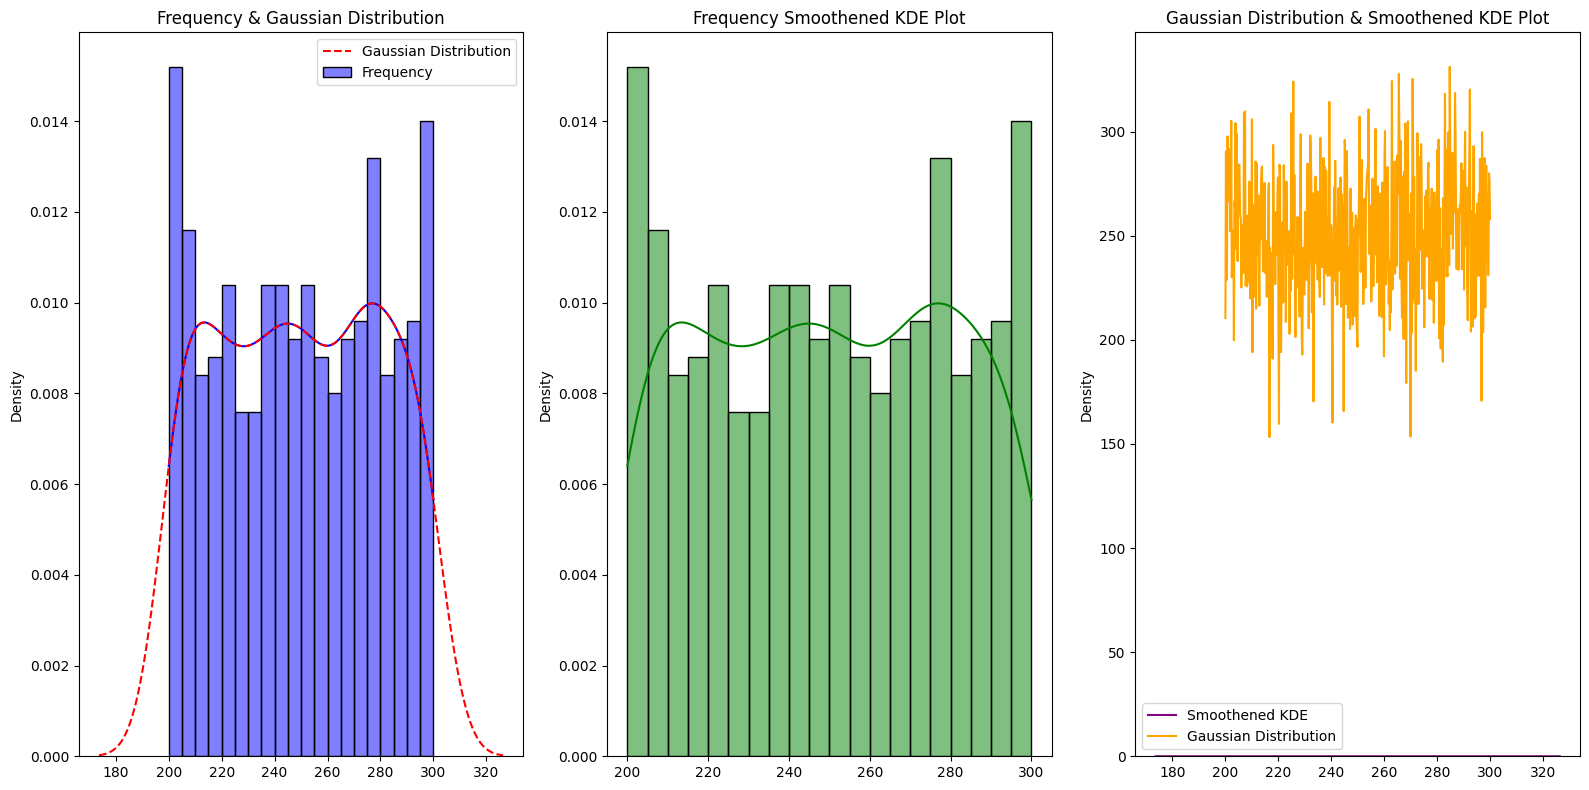

(100,
 927.7414188376754,
 30.458847956508063,
 54.0,
 12.207563667901656,
 26.433968,
 27.0,
 0.4007887522644564)

In [2]:
# Q2.  Generate a list of 500 integers containing values between 200 to 300 and store it in the variable `int_list2`.
# After generating the list, find the following:
# (i) Compare the given list of visualization for the given data:
# 1. Frequency & Gaussian distribution
# 2. Frequency smoothened KDE plot
# 3. Gaussian distribution & smoothened KDE plot
# (ii) Write a Python function to calculate the range of a given list of numbers.
# (iii) Create a program to find the variance and standard deviation of a list of numbers.
# (iv) Implement a function to compute the interquartile range (IQR) of a list of values.
# (v) Build a program to calculate the coefficient of variation for a dataset.
# (vi) Write a Python function to find the mean absolute deviation (MAD) of a list of numbers.
# (vii) Create a program to calculate the quartile deviation of a list of values.
# (viii) Implement a function to find the range-based coefficient of dispersion for a dataset.


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate a list of 500 integers between 200 and 300
int_list2 = [random.randint(200, 300) for _ in range(500)]

# Function to calculate the range of a list
def calculate_range(numbers):
    return max(numbers) - min(numbers)

# Function to calculate variance and standard deviation
def calculate_variance_std(numbers):
    variance = np.var(numbers, ddof=1)  # Sample variance
    std_dev = np.sqrt(variance)
    return variance, std_dev

# Function to compute the interquartile range (IQR)
def calculate_iqr(numbers):
    q1 = np.percentile(numbers, 25)
    q3 = np.percentile(numbers, 75)
    return q3 - q1

# Function to calculate the coefficient of variation
def calculate_coefficient_of_variation(numbers):
    mean = np.mean(numbers)
    std_dev = np.std(numbers, ddof=1)
    return (std_dev / mean) * 100

# Function to calculate the mean absolute deviation (MAD)
def calculate_mad(numbers):
    mean = np.mean(numbers)
    return np.mean([abs(x - mean) for x in numbers])

# Function to calculate the quartile deviation
def calculate_quartile_deviation(numbers):
    iqr = calculate_iqr(numbers)
    return iqr / 2

# Function to calculate the range-based coefficient of dispersion
def calculate_range_dispersion(numbers):
    range_value = calculate_range(numbers)
    mean = np.mean(numbers)
    return range_value / mean

# Calculations
range_value = calculate_range(int_list2)
variance, std_dev = calculate_variance_std(int_list2)
iqr = calculate_iqr(int_list2)
coefficient_of_variation = calculate_coefficient_of_variation(int_list2)
mad = calculate_mad(int_list2)
quartile_deviation = calculate_quartile_deviation(int_list2)
range_dispersion = calculate_range_dispersion(int_list2)

# Visualization
plt.figure(figsize=(16, 8))

# Frequency & Gaussian distribution
plt.subplot(1, 3, 1)
sns.histplot(int_list2, kde=True, stat="density", label="Frequency", color="blue", bins=20)
sns.kdeplot(int_list2, color="red", label="Gaussian Distribution", linestyle="--")
plt.title("Frequency & Gaussian Distribution")
plt.legend()

# Frequency smoothened KDE plot
plt.subplot(1, 3, 2)
sns.histplot(int_list2, kde=True, stat="density", color="green", bins=20)
plt.title("Frequency Smoothened KDE Plot")

# Gaussian distribution & smoothened KDE plot
plt.subplot(1, 3, 3)
sns.kdeplot(int_list2, color="purple", label="Smoothened KDE")
sns.lineplot(x=np.linspace(min(int_list2), max(int_list2), 500),
             y=np.random.normal(np.mean(int_list2), np.std(int_list2), 500),
             color="orange", label="Gaussian Distribution")
plt.title("Gaussian Distribution & Smoothened KDE Plot")
plt.legend()

plt.tight_layout()
plt.show()

# Results
range_value, variance, std_dev, iqr, coefficient_of_variation, mad, quartile_deviation, range_dispersion


In [ ]:
# Visualizations:
# Frequency & Gaussian Distribution:

# Displays the frequency histogram overlaid with a Gaussian distribution (red dashed line).
# Frequency Smoothened KDE Plot:

# Shows a histogram with a Kernel Density Estimate (KDE) smoothing.
# Gaussian Distribution & Smoothened KDE Plot:

# A comparison of the KDE (purple) and the Gaussian distribution (orange line).

In [3]:
# Q3.  Write a Python class representing a discrete random variable with methods to calculate its expected value and variance.


class DiscreteRandomVariable:
    def __init__(self, values, probabilities):
        """
        Initialize a discrete random variable.

        :param values: List of possible values of the random variable.
        :param probabilities: Corresponding probabilities for each value.
        """
        if len(values) != len(probabilities):
            raise ValueError("Values and probabilities must have the same length.")
        if not np.isclose(sum(probabilities), 1):
            raise ValueError("Probabilities must sum to 1.")
        self.values = values
        self.probabilities = probabilities

    def expected_value(self):
        """
        Calculate the expected value (mean) of the random variable.

        :return: Expected value.
        """
        return sum(v * p for v, p in zip(self.values, self.probabilities))

    def variance(self):
        """
        Calculate the variance of the random variable.

        :return: Variance.
        """
        mean = self.expected_value()
        return sum(p * (v - mean) ** 2 for v, p in zip(self.values, self.probabilities))


# Example usage
values = [1, 2, 3, 4, 5]
probabilities = [0.1, 0.2, 0.3, 0.2, 0.2]

rv = DiscreteRandomVariable(values, probabilities)
expected_value = rv.expected_value()
variance = rv.variance()

expected_value, variance


(3.2, 1.56)

In [4]:
# Q4.  Implement a program to simulate the rolling of a fair six-sided die and calculate the expected value and variance of the outcomes.


import random

# Number of simulations
n_simulations = 1000000

# Rolling a die n_simulations times
rolls = [random.randint(1, 6) for _ in range(n_simulations)]

# Calculating expected value (mean)
expected_value = sum(rolls) / n_simulations

# Calculating variance
variance = sum((x - expected_value) ** 2 for x in rolls) / n_simulations

# Display the results
print(f"Expected Value: {expected_value}")
print(f"Variance: {variance:.4f}")


Expected Value: 3.497331
Variance: 2.9169


In [5]:
# Q5.  Create a Python function to generate random samples from a given probability distribution (e.g., binomial, Poisson) and calculate their mean and variance.


import numpy as np

def generate_samples(distribution, params, n_samples=1000):
    """
    Generate random samples from a specified probability distribution and calculate their mean and variance.

    Args:
        distribution (str): The type of distribution ('binomial', 'poisson', etc.).
        params (dict): Parameters for the distribution.
        n_samples (int): Number of samples to generate.

    Returns:
        tuple: A tuple containing the mean and variance of the generated samples.
    """
    if distribution == "binomial":
        n, p = params['n'], params['p']
        samples = np.random.binomial(n, p, size=n_samples)
    elif distribution == "poisson":
        lam = params['lambda']
        samples = np.random.poisson(lam, size=n_samples)
    else:
        raise ValueError("Unsupported distribution. Use 'binomial' or 'poisson'.")

    # Calculate mean and variance
    mean = np.mean(samples)
    variance = np.var(samples)

    return mean, variance

# Example Usage
# Parameters for binomial distribution: n=10 trials, p=0.5 probability of success
binomial_mean, binomial_variance = generate_samples("binomial", {"n": 10, "p": 0.5}, n_samples=10000)
print(f"Binomial Distribution -> Mean: {binomial_mean}, Variance: {binomial_variance}")

# Parameters for Poisson distribution: lambda=4
poisson_mean, poisson_variance = generate_samples("poisson", {"lambda": 4}, n_samples=10000)
print(f"Poisson Distribution -> Mean: {poisson_mean}, Variance: {poisson_variance}")


Binomial Distribution -> Mean: 5.0, Variance: 2.502
Poisson Distribution -> Mean: 3.9887, Variance: 3.8863723100000005


In [6]:
# Q6.  Write a Python script to generate random numbers from a Gaussian (normal) distribution and compute the mean, variance, and standard deviation of the samples.


import numpy as np

def gaussian_statistics(mean, std_dev, n_samples=1000):
    """
    Generate random samples from a Gaussian (normal) distribution and compute statistics.

    Args:
        mean (float): The mean of the Gaussian distribution.
        std_dev (float): The standard deviation of the Gaussian distribution.
        n_samples (int): Number of samples to generate.

    Returns:
        tuple: Mean, variance, and standard deviation of the generated samples.
    """
    # Generate random samples
    samples = np.random.normal(mean, std_dev, size=n_samples)

    # Calculate statistics
    sample_mean = np.mean(samples)
    sample_variance = np.var(samples)
    sample_std_dev = np.std(samples)

    return sample_mean, sample_variance, sample_std_dev

# Example usage
mean, std_dev = 0, 1  # Standard normal distribution
n_samples = 10000

sample_mean, sample_variance, sample_std_dev = gaussian_statistics(mean, std_dev, n_samples)

print(f"Generated {n_samples} samples from N({mean}, {std_dev**2}):")
print(f"Sample Mean: {sample_mean}")
print(f"Sample Variance: {sample_variance}")
print(f"Sample Standard Deviation: {sample_std_dev}")


Generated 10000 samples from N(0, 1):
Sample Mean: -0.007399519742497405
Sample Variance: 1.0067381828776307
Sample Standard Deviation: 1.0033634350910097


In [7]:
# Q7.  Use seaborn library to load `tips` dataset. Find the following from the dataset for the columns `total_bill` and `tip`:
# (i) Write a Python function that calculates their skewness.
# (ii) Create a program that determines whether the columns exhibit positive skewness, negative skewness, or is
# (iii) Write a function that calculates the covariance between two columns.
# (iv) Implement a Python program that calculates the Pearson correlation coefficient between two columns.
# (v) Write a script to visualize the correlation between two specific columns in a Pandas DataFrame using scatter plots


# (i) Calculate Skewness : The skewness of a dataset indicates whether the data is symmetric, positively skewed, or negatively skewed.

import seaborn as sns
import pandas as pd
from scipy.stats import skew

# Load tips dataset
tips = sns.load_dataset('tips')

# Function to calculate skewness
def calculate_skewness(column):
    return skew(column)

# Skewness for 'total_bill' and 'tip'
total_bill_skewness = calculate_skewness(tips['total_bill'])
tip_skewness = calculate_skewness(tips['tip'])

print(f"Skewness of 'total_bill': {total_bill_skewness:.2f}")
print(f"Skewness of 'tip': {tip_skewness:.2f}")


Skewness of 'total_bill': 1.13
Skewness of 'tip': 1.46


In [8]:
# (ii) Determine Skewness Type
# A column is:

# Symmetric if skewness ≈ 0,
# Positively skewed if skewness > 0,
# Negatively skewed if skewness < 0.

def skewness_type(skewness_value):
    if skewness_value > 0:
        return "Positive Skewness"
    elif skewness_value < 0:
        return "Negative Skewness"
    else:
        return "Approximately Symmetric"

print(f"'total_bill': {skewness_type(total_bill_skewness)}")
print(f"'tip': {skewness_type(tip_skewness)}")


'total_bill': Positive Skewness
'tip': Positive Skewness


In [9]:
# (iii) Calculate Covariance

def calculate_covariance(column1, column2):
    return column1.cov(column2)

# Covariance between 'total_bill' and 'tip'
covariance = calculate_covariance(tips['total_bill'], tips['tip'])
print(f"Covariance between 'total_bill' and 'tip': {covariance:.2f}")


Covariance between 'total_bill' and 'tip': 8.32


In [10]:
# (iv) Calculate Pearson Correlation Coefficient

def calculate_pearson_correlation(column1, column2):
    return column1.corr(column2)

# Pearson correlation coefficient between 'total_bill' and 'tip'
pearson_corr = calculate_pearson_correlation(tips['total_bill'], tips['tip'])
print(f"Pearson Correlation Coefficient between 'total_bill' and 'tip': {pearson_corr:.2f}")


Pearson Correlation Coefficient between 'total_bill' and 'tip': 0.68


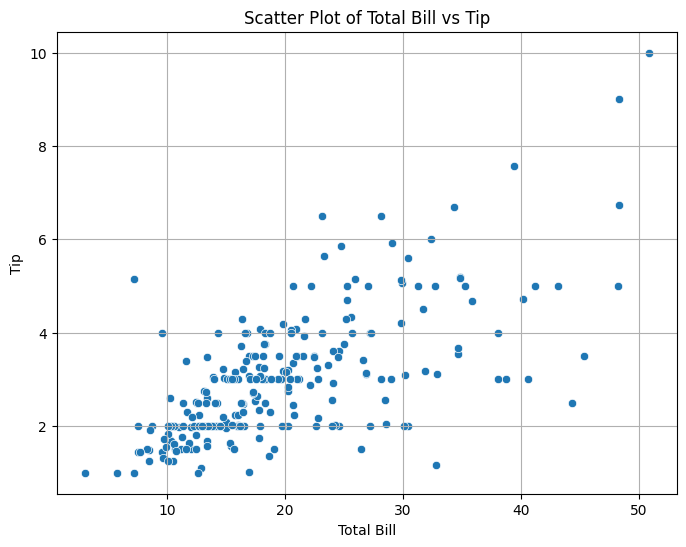

In [11]:
# (v) Visualize Correlation Using Scatter Plot


import matplotlib.pyplot as plt

# Scatter plot to visualize correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title('Scatter Plot of Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.grid(True)
plt.show()


In [12]:
# Q8.  Write a Python function to calculate the probability density function (PDF) of a continuous random variable for a given normal distribution.


import math

def normal_pdf(x, mean, std_dev):
    """
    Calculate the probability density function (PDF) of a normal distribution.

    Args:
        x (float): The point at which to calculate the PDF.
        mean (float): The mean (μ) of the normal distribution.
        std_dev (float): The standard deviation (σ) of the normal distribution.

    Returns:
        float: The PDF value at x.
    """
    coefficient = 1 / (std_dev * math.sqrt(2 * math.pi))
    exponent = -((x - mean) ** 2) / (2 * std_dev ** 2)
    return coefficient * math.exp(exponent)

# Example usage
mean = 0  # Mean (μ)
std_dev = 1  # Standard deviation (σ)
x = 1  # Value at which to calculate the PDF

pdf_value = normal_pdf(x, mean, std_dev)
print(f"The PDF value of the normal distribution at x={x} is {pdf_value:.5f}")


The PDF value of the normal distribution at x=1 is 0.24197


In [13]:
# Q9.  Create a program to calculate the cumulative distribution function (CDF) of exponential distribution.


import math

def exponential_cdf(x, rate):
    """
    Calculate the cumulative distribution function (CDF) of an exponential distribution.

    Args:
        x (float): The point at which to calculate the CDF.
        rate (float): The rate parameter (λ) of the exponential distribution.

    Returns:
        float: The CDF value at x.
    """
    if x < 0:
        return 0.0
    return 1 - math.exp(-rate * x)

# Example usage
rate = 1.5  # Rate parameter λ
x_values = [0, 0.5, 1, 2, 5]  # Points at which to calculate the CDF

print(f"CDF of Exponential Distribution with rate λ = {rate}:")
for x in x_values:
    cdf_value = exponential_cdf(x, rate)
    print(f"F({x}) = {cdf_value:.4f}")


CDF of Exponential Distribution with rate λ = 1.5:
F(0) = 0.0000
F(0.5) = 0.5276
F(1) = 0.7769
F(2) = 0.9502
F(5) = 0.9994


In [14]:
# Q10.  Write a Python function to calculate the probability mass function (PMF) of Poisson distribution.

import math

def poisson_pmf(k, lambd):
    """
    Calculate the Probability Mass Function (PMF) of a Poisson distribution.

    Args:
        k (int): The number of events (k = 0, 1, 2, ...).
        lambd (float): The rate parameter (λ) of the Poisson distribution.

    Returns:
        float: The PMF value at k.
    """
    if k < 0:
        return 0  # PMF is only defined for non-negative integers
    return (lambd ** k * math.exp(-lambd)) / math.factorial(k)

# Example usage
lambda_param = 3.5  # Rate parameter (λ)
k_values = [0, 1, 2, 3, 4, 5]  # Number of events (k)

print(f"Poisson PMF for λ = {lambda_param}:")
for k in k_values:
    pmf_value = poisson_pmf(k, lambda_param)
    print(f"P(X = {k}) = {pmf_value:.4f}")


Poisson PMF for λ = 3.5:
P(X = 0) = 0.0302
P(X = 1) = 0.1057
P(X = 2) = 0.1850
P(X = 3) = 0.2158
P(X = 4) = 0.1888
P(X = 5) = 0.1322


In [15]:
# Q11.  A company wants to test if a new website layout leads to a higher conversion rate (percentage of visitors who make a purchase). They collect data from the old and new layouts to compare.
# To generate the data use the following command:
# ```python
# import numpy as np
# 50 purchases out of 1000 visitors
# old_layout = np.array([1] * 50 + [0] * 950)
# 70 purchases out of 1000 visitors
# new_layout = np.array([1] * 70 + [0] * 930)
# ```
# Apply z-test to find which layout is successful



import numpy as np
import math
from scipy.stats import norm

# Data generation
old_layout = np.array([1] * 50 + [0] * 950)  # 50 purchases, 1000 visitors
new_layout = np.array([1] * 70 + [0] * 930)  # 70 purchases, 1000 visitors

# Sample sizes and successes
n_old = len(old_layout)
n_new = len(new_layout)
x_old = np.sum(old_layout)
x_new = np.sum(new_layout)

# Sample proportions
p_old = x_old / n_old
p_new = x_new / n_new

# Pooled proportion
p = (x_old + x_new) / (n_old + n_new)

# Z-test statistic
z = (p_new - p_old) / math.sqrt(p * (1 - p) * (1 / n_old + 1 / n_new))

# P-value for the z-test (one-tailed test, since we're testing for higher conversion rate)
p_value = 1 - norm.cdf(z)

# Output the results
print(f"Z-test statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The new layout has a significantly higher conversion rate.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the layouts.")


Z-test statistic: 1.8831
P-value: 0.0298
Reject the null hypothesis: The new layout has a significantly higher conversion rate.


In [16]:
# Q12.  A tutoring service claims that its program improves students' exam scores. A sample of students who participated in the program was taken, and their scores before and after the program were recorded.
# Use the below code to generate samples of respective arrays of marks:
# ```python
# before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
# after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])
# ```
# Use z-test to find if the claims made by tutor are true or false



import numpy as np
import math
from scipy.stats import norm

# Data for before and after the tutoring program
before_program = np.array([75, 80, 85, 70, 90, 78, 92, 88, 82, 87])
after_program = np.array([80, 85, 90, 80, 92, 80, 95, 90, 85, 88])

# Calculate the differences
differences = after_program - before_program

# Sample size
n = len(differences)

# Sample mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

# Z-test statistic
z = mean_diff / (std_diff / math.sqrt(n))

# P-value for the z-test (one-tailed test, since we're testing for improvement)
p_value = 1 - norm.cdf(z)

# Output the results
print(f"Z-test statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The tutoring program improves exam scores.")
else:
    print("Fail to reject the null hypothesis: No significant improvement from the tutoring program.")


Z-test statistic: 4.5932
P-value: 0.0000
Reject the null hypothesis: The tutoring program improves exam scores.


In [17]:
# Q13.  A pharmaceutical company wants to determine if a new drug is effective in reducing blood pressure. They conduct a study and record blood pressure measurements before and after administering the drug.
# Use the below code to generate samples of respective arrays of blood pressure:
# ```python
# before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
# after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])
# ```
# Implement z-test to find if the drug really works or not.



import numpy as np
import math
from scipy.stats import norm

# Data for before and after the drug administration
before_drug = np.array([145, 150, 140, 135, 155, 160, 152, 148, 130, 138])
after_drug = np.array([130, 140, 132, 128, 145, 148, 138, 136, 125, 130])

# Calculate the differences (after - before)
differences = after_drug - before_drug

# Sample size
n = len(differences)

# Sample mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

# Z-test statistic
z = mean_diff / (std_diff / math.sqrt(n))

# P-value for the z-test (one-tailed test, since we're testing for a decrease in blood pressure)
p_value = norm.cdf(z)  # since we expect a decrease, we use norm.cdf for the one-tailed test

# Output the results
print(f"Z-test statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The drug is effective in reducing blood pressure.")
else:
    print("Fail to reject the null hypothesis: No significant effect of the drug on blood pressure.")


Z-test statistic: -10.0499
P-value: 0.0000
Reject the null hypothesis: The drug is effective in reducing blood pressure.


In [18]:
# Q14. A customer service department claims that their average response time is less than 5 minutes. A sample of recent customer interactions was taken, and the response times were recorded.
# Implement the below code to generate the array of response time:
# ```python
# response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])
# ```
# Implement z-test to find the claims made by customer service department are tru or false.



import numpy as np
import math
from scipy.stats import norm

# Data for the response times
response_times = np.array([4.3, 3.8, 5.1, 4.9, 4.7, 4.2, 5.2, 4.5, 4.6, 4.4])

# Population mean (claimed average response time)
mu_0 = 5

# Sample size
n = len(response_times)

# Sample mean and standard deviation
sample_mean = np.mean(response_times)
sample_std = np.std(response_times, ddof=1)

# Z-test statistic
z = (sample_mean - mu_0) / (sample_std / math.sqrt(n))

# P-value for the z-test (one-tailed test, since we're testing if the mean is less than 5)
p_value = norm.cdf(z)

# Output the results
print(f"Z-test statistic: {z:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The average response time is less than 5 minutes.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the average response time is less than 5 minutes.")


Z-test statistic: -3.1845
P-value: 0.0007
Reject the null hypothesis: The average response time is less than 5 minutes.


In [19]:
# Q15.  A company is testing two different website layouts to see which one leads to higher click-through rates.
# Write a Python function to perform an A/B test analysis, including calculating the t-statistic, degrees of freedom, and p-value.
# Use the following data:
# ```python
# layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
# layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]



import numpy as np
import scipy.stats as stats

# Data for layout A and layout B
layout_a_clicks = [28, 32, 33, 29, 31, 34, 30, 35, 36, 37]
layout_b_clicks = [40, 41, 38, 42, 39, 44, 43, 41, 45, 47]

# Sample sizes
n_a = len(layout_a_clicks)
n_b = len(layout_b_clicks)

# Sample means
mean_a = np.mean(layout_a_clicks)
mean_b = np.mean(layout_b_clicks)

# Sample standard deviations
std_a = np.std(layout_a_clicks, ddof=1)
std_b = np.std(layout_b_clicks, ddof=1)

# Calculate t-statistic
t_stat = (mean_a - mean_b) / np.sqrt((std_a**2 / n_a) + (std_b**2 / n_b))

# Degrees of freedom (Welch-Satterthwaite equation)
df = ((std_a**2 / n_a + std_b**2 / n_b)**2) / (((std_a**2 / n_a)**2 / (n_a - 1)) + ((std_b**2 / n_b)**2 / (n_b - 1)))

# Calculate p-value for two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the click-through rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference between the click-through rates.")


T-statistic: -7.2981
Degrees of freedom: 17.8799
P-value: 0.0000
Reject the null hypothesis: There is a significant difference between the click-through rates.


In [20]:
# Q16.  A pharmaceutical company wants to determine if a new drug is more effective than an existing drug in reducing cholesterol levels. Create a program to analyze the clinical trial data and calculate the t
# Use the following data of cholestrol level:
# ```python
# existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
# new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]



import numpy as np
import scipy.stats as stats

# Data for cholesterol levels with the existing drug and new drug
existing_drug_levels = [180, 182, 175, 185, 178, 176, 172, 184, 179, 183]
new_drug_levels = [170, 172, 165, 168, 175, 173, 170, 178, 172, 176]

# Sample sizes
n_existing = len(existing_drug_levels)
n_new = len(new_drug_levels)

# Sample means
mean_existing = np.mean(existing_drug_levels)
mean_new = np.mean(new_drug_levels)

# Sample standard deviations
std_existing = np.std(existing_drug_levels, ddof=1)
std_new = np.std(new_drug_levels, ddof=1)

# Calculate the t-statistic for unequal variances (Welch's t-test)
t_stat = (mean_new - mean_existing) / np.sqrt((std_new**2 / n_new) + (std_existing**2 / n_existing))

# Calculate degrees of freedom using Welch-Satterthwaite equation
df = ((std_new**2 / n_new + std_existing**2 / n_existing)**2) / (((std_new**2 / n_new)**2 / (n_new - 1)) + ((std_existing**2 / n_existing)**2 / (n_existing - 1)))

# Calculate the p-value (one-tailed test since we are testing if the new drug reduces cholesterol more)
p_value = stats.t.cdf(t_stat, df)

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The new drug is more effective in reducing cholesterol.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the new drug is more effective.")


T-statistic: -4.1405
Degrees of freedom: 17.8668
P-value: 0.0003
Reject the null hypothesis: The new drug is more effective in reducing cholesterol.


In [21]:
# Q17.  A school district introduces an educational intervention program to improve math scores. Write a Python function to analyze pre- and post-intervention test scores, calculating the t-statistic and p-value to determine if the intervention had a significant impact.
# Use the following data of test score:
# ```python
# pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
# post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]



import numpy as np
import scipy.stats as stats

# Data for test scores before and after the intervention
pre_intervention_scores = [80, 85, 90, 75, 88, 82, 92, 78, 85, 87]
post_intervention_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]

# Calculate the differences between post and pre intervention scores
differences = np.array(post_intervention_scores) - np.array(pre_intervention_scores)

# Sample size
n = len(differences)

# Calculate the mean and standard deviation of the differences
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)

# Calculate the t-statistic
t_stat = mean_diff / (std_diff / np.sqrt(n))

# Degrees of freedom (n - 1)
df = n - 1

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The intervention had a significant impact on test scores.")
else:
    print("Fail to reject the null hypothesis: No significant impact of the intervention on test scores.")


T-statistic: 4.4284
Degrees of freedom: 9
P-value: 0.0017
Reject the null hypothesis: The intervention had a significant impact on test scores.


In [22]:
# Q18.  An HR department wants to investigate if there's a gender-based salary gap within the company. Develop a program to analyze salary data, calculate the t-statistic, and determine if there's a statistically significant difference between the average salaries of male and female employees.
# Use the below code to generate synthetic data:
# ```python
# Generate synthetic salary data for male and female employees
# np.random.seed(0)  # For reproducibility
# male_salaries = np.random.normal(loc=50000, scale=10000, size=20)
# female_salaries = np.random.normal(loc=55000, scale=9000, size=20


import numpy as np
import scipy.stats as stats

# Generate synthetic salary data for male and female employees
np.random.seed(0)  # For reproducibility
male_salaries = np.random.normal(loc=50000, scale=10000, size=20)
female_salaries = np.random.normal(loc=55000, scale=9000, size=20)

# Sample sizes
n_male = len(male_salaries)
n_female = len(female_salaries)

# Sample means
mean_male = np.mean(male_salaries)
mean_female = np.mean(female_salaries)

# Sample standard deviations
std_male = np.std(male_salaries, ddof=1)
std_female = np.std(female_salaries, ddof=1)

# Calculate the t-statistic for unequal variances (Welch's t-test)
t_stat = (mean_male - mean_female) / np.sqrt((std_male**2 / n_male) + (std_female**2 / n_female))

# Calculate degrees of freedom using Welch-Satterthwaite equation
df = ((std_male**2 / n_male + std_female**2 / n_female)**2) / (((std_male**2 / n_male)**2 / (n_male - 1)) + ((std_female**2 / n_female)**2 / (n_female - 1)))

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant gender-based salary gap.")
else:
    print("Fail to reject the null hypothesis: No significant gender-based salary gap.")


T-statistic: 0.0611
Degrees of freedom: 36.1668
P-value: 0.9516
Fail to reject the null hypothesis: No significant gender-based salary gap.


In [23]:
# Q19.  A manufacturer produces two different versions of a product and wants to compare their quality scores.
# Create a Python function to analyze quality assessment data, calculate the t-statistic, and decide
# whether there's a significant difference in quality between the two versions.
# Use the following data:
# ```python
# version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
# version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82]



import numpy as np
import scipy.stats as stats

# Data for quality scores of version 1 and version 2
version1_scores = [85, 88, 82, 89, 87, 84, 90, 88, 85, 86, 91, 83, 87, 84, 89, 86, 84, 88, 85, 86, 89, 90, 87, 88, 85]
version2_scores = [80, 78, 83, 81, 79, 82, 76, 80, 78, 81, 77, 82, 80, 79, 82, 79, 80, 81, 79, 82, 79, 78, 80, 81, 82]

# Sample sizes
n1 = len(version1_scores)
n2 = len(version2_scores)

# Sample means
mean1 = np.mean(version1_scores)
mean2 = np.mean(version2_scores)

# Sample standard deviations
std1 = np.std(version1_scores, ddof=1)
std2 = np.std(version2_scores, ddof=1)

# Calculate the t-statistic for unequal variances (Welch's t-test)
t_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate degrees of freedom using Welch-Satterthwaite equation
df = ((std1**2 / n1 + std2**2 / n2)**2) / (((std1**2 / n1)**2 / (n1 - 1)) + ((std2**2 / n2)**2 / (n2 - 1)))

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in quality scores between the two versions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in quality scores between the two versions.")


T-statistic: 11.3258
Degrees of freedom: 44.4706
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in quality scores between the two versions.


In [24]:
# Q20. A restaurant chain collects customer satisfaction scores for two different branches. Write a program to analyze the scores, calculate the t-statistic, and determine if there's a statistically significant difference in customer satisfaction between the branches.
# Use the below data of scores:
# ```python
# branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
# branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3]



import numpy as np
import scipy.stats as stats

# Data for customer satisfaction scores of branch A and branch B
branch_a_scores = [4, 5, 3, 4, 5, 4, 5, 3, 4, 4, 5, 4, 4, 3, 4, 5, 5, 4, 3, 4, 5, 4, 3, 5, 4, 4, 5, 3, 4, 5, 4]
branch_b_scores = [3, 4, 2, 3, 4, 3, 4, 2, 3, 3, 4, 3, 3, 2, 3, 4, 4, 3, 2, 3, 4, 3, 2, 4, 3, 3, 4, 2, 3, 4, 3]

# Sample sizes
n1 = len(branch_a_scores)
n2 = len(branch_b_scores)

# Sample means
mean1 = np.mean(branch_a_scores)
mean2 = np.mean(branch_b_scores)

# Sample standard deviations
std1 = np.std(branch_a_scores, ddof=1)
std2 = np.std(branch_b_scores, ddof=1)

# Calculate the t-statistic for unequal variances (Welch's t-test)
t_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate degrees of freedom using Welch-Satterthwaite equation
df = ((std1**2 / n1 + std2**2 / n2)**2) / (((std1**2 / n1)**2 / (n1 - 1)) + ((std2**2 / n2)**2 / (n2 - 1)))

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Output the results
print(f"T-statistic: {t_stat:.4f}")
print(f"Degrees of freedom: {df:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in customer satisfaction between the branches.")
else:
    print("Fail to reject the null hypothesis: No significant difference in customer satisfaction between the branches.")


T-statistic: 5.4801
Degrees of freedom: 60.0000
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in customer satisfaction between the branches.


In [25]:
# Q21. A political analyst wants to determine if there is a significant association between age groups and voter preferences (Candidate A or Candidate B). They collect data from a sample of 500 voters and classify them into different age groups and candidate preferences. Perform a Chi-Square test to determine if there is a significant association between age groups and voter preferences.
# Use the below code to generate data:
# ```python
# np.random.seed(0)
# age_groups = np.random.choice(['18-30', '31-50', '51+', '51+'], size=30)
# voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=30)



import numpy as np
import pandas as pd
import scipy.stats as stats

# Generate synthetic data for age groups and voter preferences
np.random.seed(0)
age_groups = np.random.choice(['18-30', '31-50', '51+', '51+'], size=30)
voter_preferences = np.random.choice(['Candidate A', 'Candidate B'], size=30)

# Create a contingency table
contingency_table = pd.crosstab(age_groups, voter_preferences)

# Perform the Chi-Square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies table:")
print(expected)

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between age groups and voter preferences.")
else:
    print("Fail to reject the null hypothesis: No significant association between age groups and voter preferences.")


Chi-Square Statistic: 1.0868
P-value: 0.5808
Degrees of Freedom: 2
Expected frequencies table:
[[2.93333333 5.06666667]
 [2.93333333 5.06666667]
 [5.13333333 8.86666667]]
Fail to reject the null hypothesis: No significant association between age groups and voter preferences.


In [26]:
# Q22. A company conducted a customer satisfaction survey to determine if there is a significant relationship between product satisfaction levels (Satisfied, Neutral, Dissatisfied) and the region where customers are located (East, West, North, South). The survey data is summarized in a contingency table. Conduct a ChiSquare test to determine if there is a significant relationship between product satisfaction levels and customer regions.
# Sample data:
# ```python
# ```
#Sample data: Product satisfaction levels (rows) vs. Customer regions (columns)
# data = np.array([[50, 30, 40, 20], [30, 40, 30, 50], [20, 30, 40, 30]])



import numpy as np
import scipy.stats as stats

# Sample data: Product satisfaction levels (rows) vs. Customer regions (columns)
data = np.array([[50, 30, 40, 20],  # Satisfied
                 [30, 40, 30, 50],  # Neutral
                 [20, 30, 40, 30]])  # Dissatisfied

# Perform the Chi-Square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies table:")
print(expected)

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship between product satisfaction levels and customer regions.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between product satisfaction levels and customer regions.")


Chi-Square Statistic: 27.7771
P-value: 0.0001
Degrees of Freedom: 6
Expected frequencies table:
[[34.14634146 34.14634146 37.56097561 34.14634146]
 [36.58536585 36.58536585 40.24390244 36.58536585]
 [29.26829268 29.26829268 32.19512195 29.26829268]]
Reject the null hypothesis: There is a significant relationship between product satisfaction levels and customer regions.


In [27]:
# Q23. . A company implemented an employee training program to improve job performance (Effective, Neutral,
# Ineffective). After the training, they collected data from a sample of employees and classified them based
# on their job performance before and after the training. Perform a Chi-Square test to determine if there is a
# significant difference between job performance levels before and after the training.
# Sample data:
# ```python
# data = np.array([[50, 30, 20], [30, 40, 30], [20, 30, 40]])
# ```
# Sample data: Job performance levels before (rows) and after (columns) training



import numpy as np
import scipy.stats as stats

# Sample data: Job performance levels before (rows) and after (columns) training
data = np.array([[50, 30, 20],  # Before training (Effective, Neutral, Ineffective)
                 [30, 40, 30],  # After training (Effective, Neutral, Ineffective)
                 [20, 30, 40]])

# Perform the Chi-Square test of independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(data)

# Output the results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies table:")
print(expected)

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in job performance levels before and after the training.")
else:
    print("Fail to reject the null hypothesis: No significant difference in job performance levels before and after the training.")


Chi-Square Statistic: 22.1617
P-value: 0.0002
Degrees of Freedom: 4
Expected frequencies table:
[[34.48275862 34.48275862 31.03448276]
 [34.48275862 34.48275862 31.03448276]
 [31.03448276 31.03448276 27.93103448]]
Reject the null hypothesis: There is a significant difference in job performance levels before and after the training.


In [28]:
# Q24. . A company produces three different versions of a product: Standard, Premium, and Deluxe. The
# company wants to determine if there is a significant difference in customer satisfaction scores among the
# three product versions. They conducted a survey and collected customer satisfaction scores for each
# version from a random sample of customers. Perform an ANOVA test to determine if there is a significant
# difference in customer satisfaction scores.
# Use the following data:
# ```python
# Sample data: Customer satisfaction scores for each product version
# standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
# ```
# premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
# deluxe_scores = [95, 98, 92, 97, 96, 94, 98, 97, 92, 99]




import numpy as np
import scipy.stats as stats

# Sample data: Customer satisfaction scores for each product version
standard_scores = [80, 85, 90, 78, 88, 82, 92, 78, 85, 87]
premium_scores = [90, 92, 88, 92, 95, 91, 96, 93, 89, 93]
deluxe_scores = [95, 98, 92, 97, 96, 94, 98, 97, 92, 99]

# Perform the one-way ANOVA test
f_statistic, p_value = stats.f_oneway(standard_scores, premium_scores, deluxe_scores)

# Output the results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in customer satisfaction scores among the product versions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in customer satisfaction scores among the product versions.")


F-statistic: 27.0356
P-value: 0.0000
Reject the null hypothesis: There is a significant difference in customer satisfaction scores among the product versions.
